In [2]:
from tkinter import Tk, filedialog, simpledialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_dataset():
    Tk().withdraw()

    file_path = filedialog.askopenfilename(
        title="Seleziona un file Excel",
        filetypes=[("Excel files", "*.xls *.xlsx")]
    )
    if not file_path:
        print("Nessun file selezionato.")
        return [], None, None

    thickness_nm = simpledialog.askfloat(
        "Input", "Inserisci lo spessore del campione in nm:"
    )
    if thickness_nm is None or thickness_nm <= 0:
        print("Errore: lo spessore deve essere un numero positivo.")
        return [], None, None

    thickness_cm = thickness_nm * 1e-7

    data = pd.read_excel(file_path, sheet_name=1, header=None)

    # Lettura corretta delle colonne
    S_48 = pd.to_numeric(data.iloc[:, 0], errors='coerce').dropna().reset_index(drop=True)
    Counts_48 = pd.to_numeric(data.iloc[:, 2], errors='coerce').dropna().reset_index(drop=True)

    S_68 = pd.to_numeric(data.iloc[:, 3], errors='coerce').dropna().reset_index(drop=True)
    Counts_68 = pd.to_numeric(data.iloc[:, 5], errors='coerce').dropna().reset_index(drop=True)

    S_78 = pd.to_numeric(data.iloc[:, 6], errors='coerce').dropna().reset_index(drop=True)
    Counts_78 = pd.to_numeric(data.iloc[:, 8], errors='coerce').dropna().reset_index(drop=True)

    ddf = pd.DataFrame({
        'S_48': S_48.values,
        'Counts_48': Counts_48.values,
        'S_68': S_68.values,
        'Counts_68': Counts_68.values,
        'S_78': S_78.values,
        'Counts_78': Counts_78.values
    })

    print(ddf.head(10))

    return ddf, thickness_cm, thickness_nm

# Chiamata alla funzione
df, thickness_cm, thickness_nm = load_dataset()
if df.empty:
    print("Il DataFrame è vuoto. Assicurati che il file Excel contenga dati validi.")

       S_48  Counts_48      S_68  Counts_68      S_78  Counts_78
0  1000.660   0.930953  1000.660   0.925941  1000.660   0.942559
1   999.548   0.938111   999.548   0.941225   999.548   0.975458
2   998.440   0.954074   998.440   0.988507   998.440   0.999329
3   997.332   0.933806   997.332   0.981512   997.332   0.967858
4   996.223   0.959155   996.223   1.008756   996.223   1.030871
5   995.115   0.951413   995.115   0.998073   995.115   0.988968
6   994.006   0.984798   994.006   1.000558   994.006   1.030043
7   992.897   0.983311   992.897   1.004094   992.897   1.024151
8   991.788   0.992103   991.788   0.989731   991.788   1.010958
9   990.679   1.017425   990.679   1.045907   990.679   1.033237


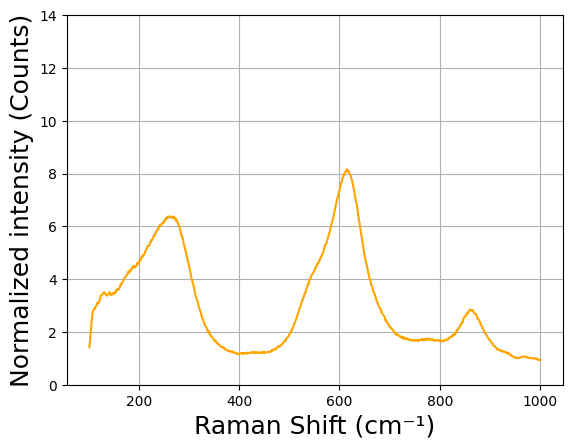

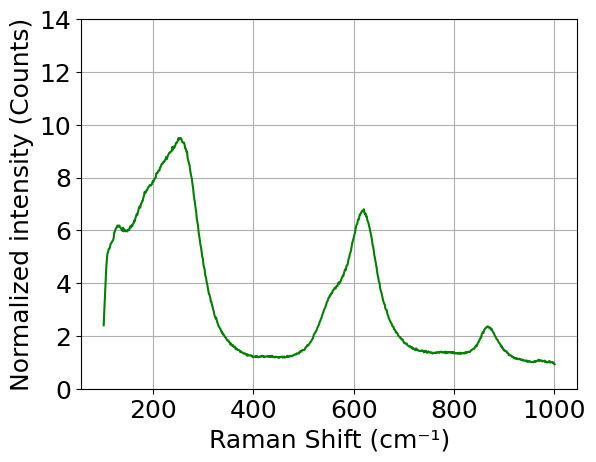

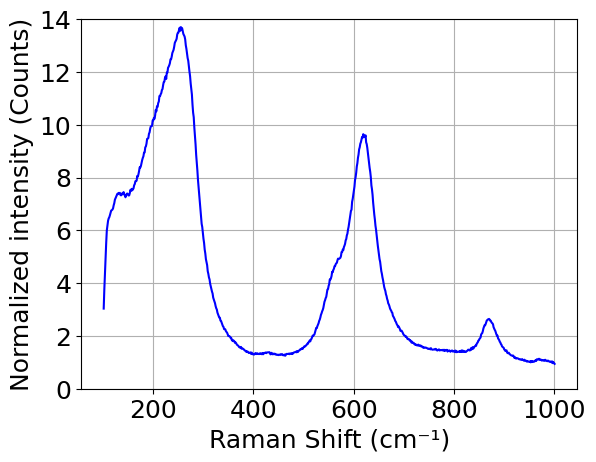

In [4]:
plt.figure()
plt.plot(df['S_48'], df['Counts_48'], color='orange')
plt.xlabel('Raman Shift (cm⁻¹)', fontsize = 18)
plt.ylabel('Normalized intensity (Counts)',fontsize = 18)
plt.rcParams.update({'font.size': 18})
plt.ylim(0, 14)
plt.grid(True)

# Spettro 68%
plt.figure()
plt.plot(df['S_68'], df['Counts_68'], color='green')
plt.xlabel('Raman Shift (cm⁻¹)',fontsize = 18)
plt.ylabel('Normalized intensity (Counts)',fontsize = 18)
plt.rcParams.update({'font.size': 18})
plt.ylim(0, 14)
plt.grid(True)

# Spettro 78%
plt.figure()
plt.plot(df['S_78'], df['Counts_78'], color='blue')
plt.xlabel('Raman Shift (cm⁻¹)',fontsize = 18)
plt.ylabel('Normalized intensity (Counts)',fontsize = 18)
plt.rcParams.update({'font.size': 18})
plt.ylim(0, 14)
plt.grid(True)


(0.0, 38.0)

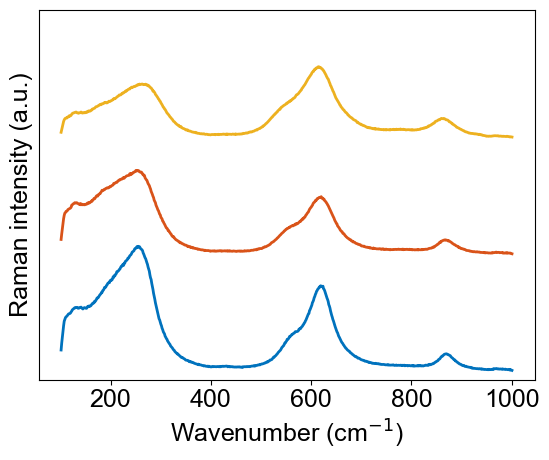

In [ ]:
plt.figure()
shift = 12
plt.plot(df['S_48'], df['Counts_48'] + 2*shift, label='48% Na', color=(0.9290, 0.6940, 0.1250), linewidth=2)
plt.plot(df['S_68'], df['Counts_68']+shift, label='68% Na', color=(0.8500, 0.3250, 0.0980),linewidth=2)
plt.plot(df['S_78'], df['Counts_78'], label='78% Na', color=(0.0000, 0.4470, 0.7410),linewidth=2)
plt.xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=18)
plt.ylabel('Raman intensity (a.u.)')
plt.yticks([]) # Rimuove le etichette dell'asse y
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.ylim(0, 14 + 2*shift)
#plt.grid(True)


# Extraction of the FWHM and the peak positions from the graphs

In [5]:
from scipy.signal import find_peaks

def detect_peak(x, y, expected_shift, window=20):
    """
    Detects the peak closest to the expected Raman shift value.
    """
    peaks, _ = find_peaks(y, height=1)
    peak_positions = x[peaks]
    peak_heights = y[peaks]

    # Filter peaks near the expected region
    mask = np.abs(peak_positions - expected_shift) < window
    if np.any(mask):
        closest_idx = np.argmin(np.abs(peak_positions[mask] - expected_shift))
        peak_shift = peak_positions[mask][closest_idx]
        peak_intensity = peak_heights[mask][closest_idx]
        return peak_shift, peak_intensity
    else:
        return None, None


v₅ (48% Na): peak at 915.98 cm⁻¹, intensity 1.35


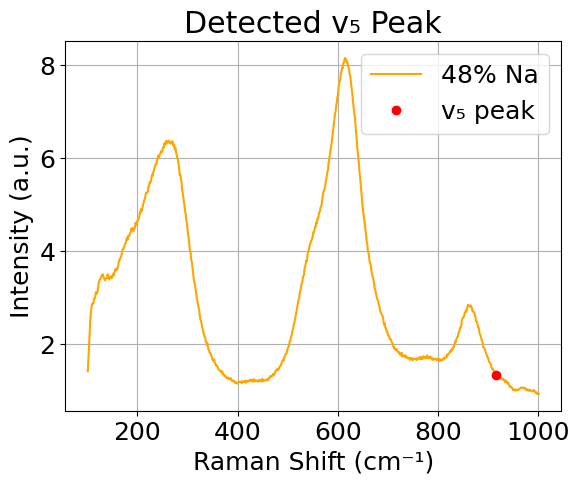

In [10]:
v5_shift_48, v5_intensity_48 = detect_peak(df['S_48'].values, df['Counts_48'].values, expected_shift=900)

if v5_shift_48 is not None:
    print(f"v₅ (48% Na): peak at {v5_shift_48:.2f} cm⁻¹, intensity {v5_intensity_48:.2f}")
    plt.figure()
    plt.plot(df['S_48'], df['Counts_48'], color='orange', label='48% Na')
    plt.plot(v5_shift_48, v5_intensity_48, 'ro', label='v₅ peak')
    plt.xlabel('Raman Shift (cm⁻¹)')
    plt.ylabel('Intensity (a.u.)')
    plt.legend()
    plt.grid(True)
    plt.title("Detected v₅ Peak")
    plt.show()
else:
    print("No v₅ peak found near 266 cm⁻¹.")

### Peak detection for MN014 (50 Na at. %)

Peak positions (cm⁻¹): [859.75 833.74 693.13 614.26 556.93 503.91 337.81 262.59 236.95 207.54
 181.72 155.82 131.07]
Peak intensities: [2.85 2.06 2.45 8.16 4.62 2.07 2.05 6.38 5.88 4.91 4.34 3.61 3.5 ]


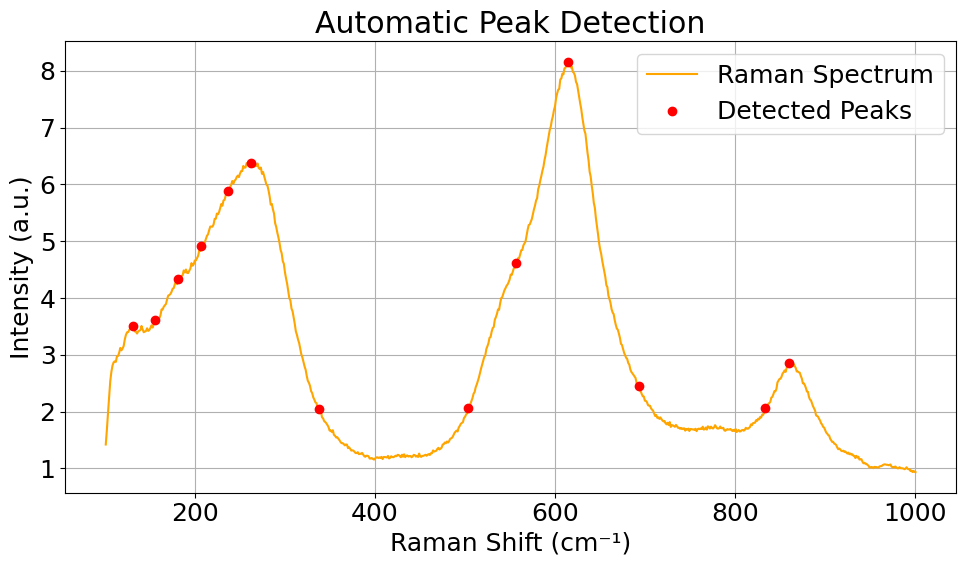

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def find_all_peaks(x, y, height=1.5, distance=20):
    """
    Trova tutti i picchi nel segnale y, restituisce posizione e intensità.
    """
    peaks, properties = find_peaks(y, height=height, distance=distance)
    peak_positions = x[peaks]
    peak_heights = y[peaks]

    return peak_positions, peak_heights

# Esempio per il campione al 48%
x = df['S_48'].values
y = df['Counts_48'].values

# Trova i picchi
peak_pos, peak_int = find_all_peaks(x, y, height=2, distance=20)

# Stampa risultati
print("Peak positions (cm⁻¹):", np.round(peak_pos, 2))
print("Peak intensities:", np.round(peak_int, 2))

# Grafico con picchi evidenziati
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Raman Spectrum', color='orange')
plt.plot(peak_pos, peak_int, 'ro', label='Detected Peaks')
plt.xlabel('Raman Shift (cm⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Automatic Peak Detection')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Peak detection for MK007 (68 Na at. %)

Peak positions (cm⁻¹): [867.65 685.04 620.09 582.73 555.76 325.73 255.27 225.93 198.94 173.1
 132.31]
Peak intensities: [2.36 2.14 6.8  4.52 3.63 2.69 9.49 8.78 7.86 6.91 6.18]


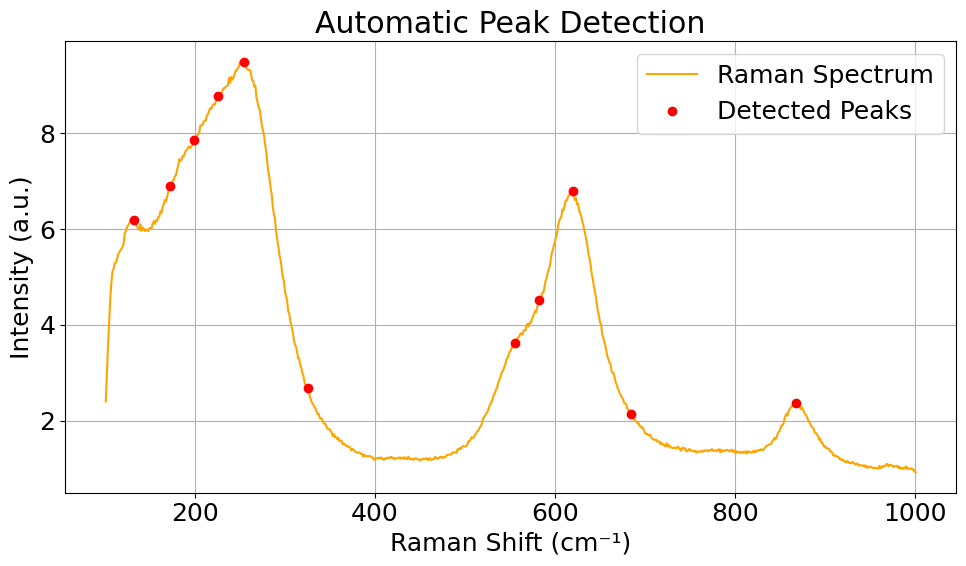

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def find_all_peaks(x, y, height, distance):
    """
    Trova tutti i picchi nel segnale y, restituisce posizione e intensità.
    """
    peaks, properties = find_peaks(y, height=height, distance=distance)
    peak_positions = x[peaks]
    peak_heights = y[peaks]

    return peak_positions, peak_heights

# Esempio per il campione al 48%
x = df['S_68'].values #Passo i valori dello shift di Raman
y = df['Counts_68'].values #Passo i valori dei counts

# Trova i picchi
peak_pos, peak_int = find_all_peaks(x, y, height=2, distance=20)

# Stampa risultati
print("Peak positions (cm⁻¹):", np.round(peak_pos, 2))
print("Peak intensities:", np.round(peak_int, 2))

# Grafico con picchi evidenziati
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Raman Spectrum', color='orange')
plt.plot(peak_pos, peak_int, 'ro', label='Detected Peaks')
plt.xlabel('Raman Shift (cm⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Automatic Peak Detection')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Peak detection for MN005 (78 Na at. %)

Peak positions (cm⁻¹): [869.9  689.66 618.92 578.04 552.24 525.16 342.64 255.27 227.16 201.4
 173.1  140.98]
Peak intensities: [ 2.64  2.36  9.64  5.27  4.14  2.3   2.26 13.7  11.97 10.26  8.39  7.45]


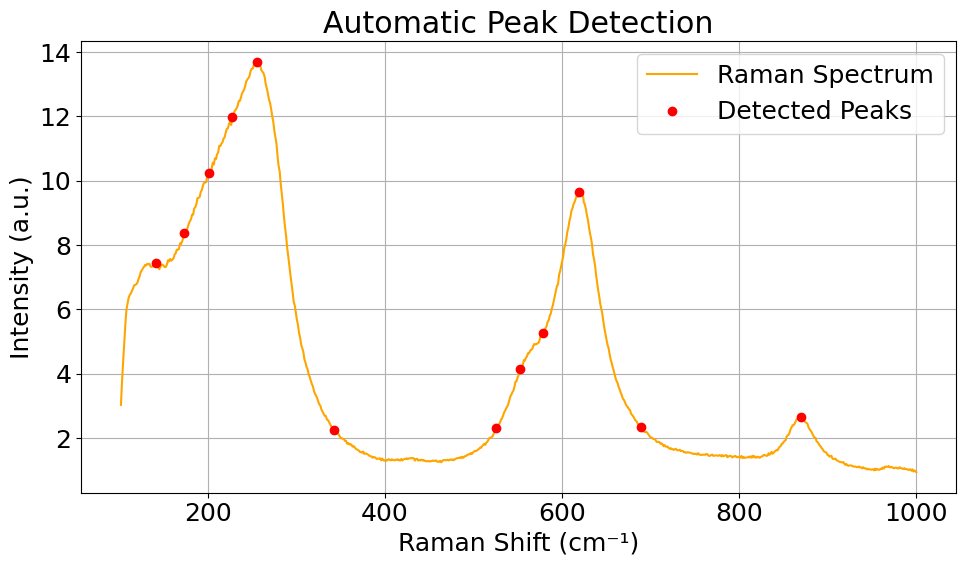

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def find_all_peaks(x, y, height, distance):
    """
    Trova tutti i picchi nel segnale y, restituisce posizione e intensità.
    """
    peaks, properties = find_peaks(y, height=height, distance=distance)
    peak_positions = x[peaks]
    peak_heights = y[peaks]

    return peak_positions, peak_heights

# Esempio per il campione al 48%
x = df['S_78'].values #Passo i valori dello shift di Raman
y = df['Counts_78'].values #Passo i valori dei counts

# Trova i picchi
peak_pos, peak_int = find_all_peaks(x, y, height=2, distance=20)

# Stampa risultati
print("Peak positions (cm⁻¹):", np.round(peak_pos, 2))
print("Peak intensities:", np.round(peak_int, 2))

# Grafico con picchi evidenziati
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Raman Spectrum', color='orange')
plt.plot(peak_pos, peak_int, 'ro', label='Detected Peaks')
plt.xlabel('Raman Shift (cm⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Automatic Peak Detection')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 151
    # data points      = 767
    # variables        = 9
    chi-square         = 278.993961
    reduced chi-square = 0.36806591
    Akaike info crit   = -757.664542
    Bayesian info crit = -715.882161
    R-squared          = 0.94272721
[[Variables]]
    g1_amplitude:  1854.09232 +/- 16.5865693 (0.89%) (init = 10)
    g1_center:     216.386181 +/- 0.83321831 (0.39%) (init = 255.27)
    g1_sigma:      83.8644904 +/- 0.92737552 (1.11%) (init = 4)
    g2_amplitude:  832.394352 +/- 16.1385514 (1.94%) (init = 8)
    g2_center:     605.599837 +/- 1.19373078 (0.20%) (init = 620.09)
    g2_sigma:      59.2016240 +/- 1.18978891 (2.01%) (init = 4)
    g3_amplitude:  421.849644 +/- 21.8148054 (5.17%) (init = 6)
    g3_center:     863.088831 +/- 4.56242374 (0.53%) (init = 867.65)
    g3_sigma:      94.61267

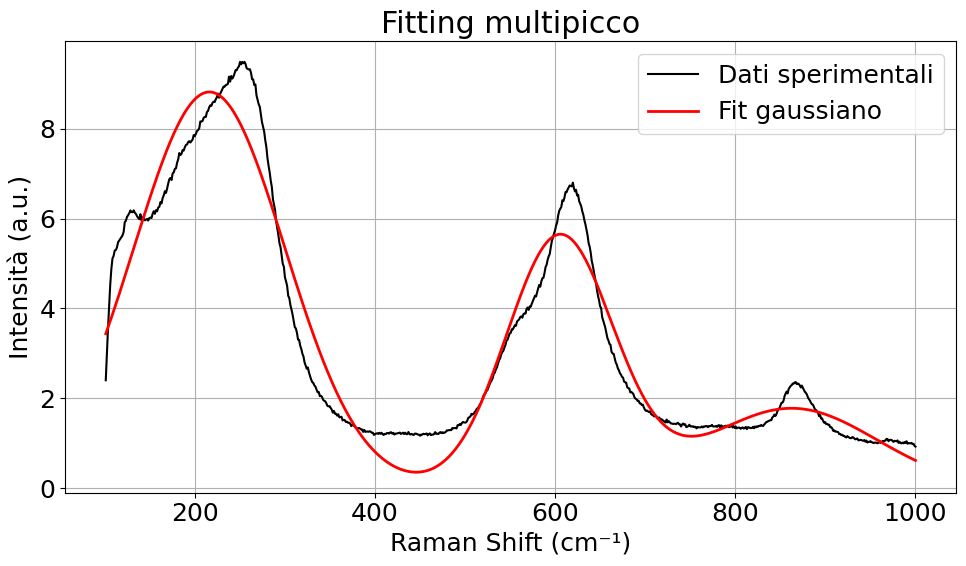

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel

# Dati (puoi usare anche i dati smooth se vuoi)
x = df['S_68'].values
y = df['Counts_68'].values

# ---- Crea modello con somma di Gaussiane ----
model = GaussianModel(prefix='g1_') + GaussianModel(prefix='g2_') + GaussianModel(prefix='g3_')

# ---- Parametri iniziali ----
params = model.make_params()

# Primo picco (es. attorno a 266 cm⁻¹)
params['g1_center'].set(value=255.27)
params['g1_amplitude'].set(value=10)
params['g1_sigma'].set(value=4)

# Secondo picco (es. vicino a 290 cm⁻¹)
params['g2_center'].set(value=620.09)
params['g2_amplitude'].set(value=8)
params['g2_sigma'].set(value=4)

# Terzo picco (ipotetico a 320 cm⁻¹)
params['g3_center'].set(value=867.65)
params['g3_amplitude'].set(value=6)
params['g3_sigma'].set(value=4)

# ---- Fitting ----
result = model.fit(y, params, x=x)

# ---- Risultati ----
print(result.fit_report())

# ---- Grafico ----
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Dati sperimentali', color='black')
plt.plot(x, result.best_fit, label='Fit gaussiano', color='red', lw=2)
plt.xlabel('Raman Shift (cm⁻¹)')
plt.ylabel('Intensità (a.u.)')
plt.title('Fitting multipicco')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.optimize import curve_fit

# Gaussian function
def gaussian(x, A, x0, sigma):
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Load your data here (replace with your own)
# Example: df = pd.read_csv("your_data.csv")
# x = df['Wavenumber']
# y = df['Intensity']

# Simulated placeholder data (replace this!)
# Or use your actual df['S_48'], df['Counts_48']
x = df['S_68'].values
y = df['Counts_68'].values
# Region to explore (focus on the main peak)
mask = (x > 400) & (x < 750)
x_peak = x[mask]
y_peak = y[mask]

# Interactive plot function
def update(A=5.0, x0=610.0, sigma=30.0):
    y_fit = gaussian(x_peak, A, x0, sigma)
    plt.figure(figsize=(6, 4))
    plt.plot(x_peak, y_peak, label='Raw Spectrum')
    plt.plot(x_peak, y_fit, 'r--', label='Gaussian Guess')
    plt.title(f"Manual Guess: A={A:.2f}, x₀={x0:.2f}, σ={sigma:.2f}")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Sliders
interact(
    update,
    A=FloatSlider(min=0, max=10, step=0.1, value=5),
    x0=FloatSlider(min=580, max=640, step=0.5, value=610),
    sigma=FloatSlider(min=5, max=80, step=1, value=30)
)


interactive(children=(FloatSlider(value=5.0, description='A', max=10.0), FloatSlider(value=610.0, description=…

<function __main__.update(A=5.0, x0=610.0, sigma=30.0)>

In [18]:
from scipy.special import wofz
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np

# Voigt without normalization
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z))

# --- Load your data ---
x = df['S_48'].values
y = df['Counts_48'].values
mask = (x > 400) & (x < 750)
x_peak = x[mask]
y_peak = y[mask]

# --- Subtract constant background (simple flat baseline)
baseline = np.min(y_peak[:10])  # or manually set like baseline = 1.0
y_corrected = y_peak - baseline
y_corrected = np.clip(y_corrected, 0, None)  # avoid negative values

# --- Interactive function with Voigt
def update_voigt(A=5.0, x0=610.0, sigma=30.0, gamma=10.0):
    y_fit = voigt(x_peak, A, x0, sigma, gamma)

    fwhm = 0.5346 * 2 * gamma + np.sqrt(0.2166 * (2 * gamma)**2 + (2.3548 * sigma)**2)

    plt.figure(figsize=(6, 4))
    plt.plot(x_peak, y_peak, label='Original Spectrum')
    plt.plot(x_peak, y_corrected, color='gray', alpha=0.6, label='Background Subtracted')
    plt.plot(x_peak, y_fit, 'r--', label='Voigt Fit')
    plt.title(f"Voigt Guess: A={A:.2f}, x₀={x0:.2f}, σ={sigma:.2f}, γ={gamma:.2f}\nFWHM ≈ {fwhm:.2f} cm⁻¹")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Sliders
interact(
    update_voigt,
    A=FloatSlider(min=0, max=15, step=0.1, value=10),
    x0=FloatSlider(min=580, max=640, step=0.5, value=610),
    sigma=FloatSlider(min=1, max=80, step=1, value=30),
    gamma=FloatSlider(min=1, max=80, step=1, value=10)
)



interactive(children=(FloatSlider(value=10.0, description='A', max=15.0), FloatSlider(value=610.0, description…

<function __main__.update_voigt(A=5.0, x0=610.0, sigma=30.0, gamma=10.0)>

### Two peak Voigt fitting


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.special import wofz

# --- Voigt profile (unnormalized) ---
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z))

# --- Two-peak Voigt function ---
def double_voigt(x, A1, x01, sigma1, gamma1, A2, x02, sigma2, gamma2):
    return (
        voigt(x, A1, x01, sigma1, gamma1) +
        voigt(x, A2, x02, sigma2, gamma2)
    )

# --- Load your Raman data ---
x = df['S_68'].values
y = df['Counts_68'].values
mask = (x > 400) & (x < 750)
x_peak = x[mask]
y_peak = y[mask]

# --- Subtract constant baseline (simple)
baseline = np.min(y_peak[:10])  # or set manually
y_corrected = y_peak - baseline
y_corrected = np.clip(y_corrected, 0, None)

# --- Interactive function with FWHM₁ ---
def update_double_voigt(
    A1=5.0, x01=610.0, sigma1=30.0, gamma1=10.0,
    A2=3.0, x02=635.0, sigma2=20.0, gamma2=8.0
):
    # Individual peaks
    y_fit1 = voigt(x_peak, A1, x01, sigma1, gamma1)
    y_fit2 = voigt(x_peak, A2, x02, sigma2, gamma2)
    y_fit = y_fit1 + y_fit2

    # FWHM for Peak 1
    fwhm1 = 0.5346 * 2 * gamma1 + np.sqrt(0.2166 * (2 * gamma1)**2 + (2.3548 * sigma1)**2)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(x_peak, y_peak, label='Original Spectrum')
    plt.plot(x_peak, y_corrected, color='gray', alpha=0.5, label='Baseline-subtracted')
    plt.plot(x_peak, y_fit1, 'g--', label='Peak 1')
    plt.plot(x_peak, y_fit2, 'b--', label='Peak 2')
    plt.plot(x_peak, y_fit, 'r-', label='Sum Fit')
    plt.title(f"Two-Peak Voigt Fit | FWHM₁ ≈ {fwhm1:.2f} cm⁻¹")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Sliders ---
interact(
    update_double_voigt,
    A1=FloatSlider(min=0, max=15, step=0.1, value=5),
    x01=FloatSlider(min=580, max=640, step=0.5, value=610),
    sigma1=FloatSlider(min=1, max=80, step=1, value=30),
    gamma1=FloatSlider(min=1, max=80, step=1, value=10),
    A2=FloatSlider(min=0, max=15, step=0.1, value=3),
    x02=FloatSlider(min=500, max=640, step=0.5, value=635),
    sigma2=FloatSlider(min=1, max=80, step=1, value=20),
    gamma2=FloatSlider(min=1, max=80, step=1, value=8),
)


interactive(children=(FloatSlider(value=5.0, description='A1', max=15.0), FloatSlider(value=610.0, description…

<function __main__.update_double_voigt(A1=5.0, x01=610.0, sigma1=30.0, gamma1=10.0, A2=3.0, x02=635.0, sigma2=20.0, gamma2=8.0)>

### Triple Voight peak simulation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.special import wofz

# --- Voigt profile ---
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z))

# --- Three-peak Voigt function ---
def triple_voigt(x,
                 A1, x01, sigma1, gamma1,
                 A2, x02, sigma2, gamma2,
                 A3, x03, sigma3, gamma3):
    return (
        voigt(x, A1, x01, sigma1, gamma1) +
        voigt(x, A2, x02, sigma2, gamma2) +
        voigt(x, A3, x03, sigma3, gamma3)
    )

# --- Load your Raman data ---
x = df['S_68'].values
y = df['Counts_68'].values
mask = (x > 400) & (x < 750)
x_peak = x[mask]
y_peak = y[mask]

# --- Subtract baseline ---
baseline = np.min(y_peak[:10])
y_corrected = np.clip(y_peak - baseline, 0, None)

# --- Interactive fitting function ---
def update_triple_voigt(
    A1=5.0, x01=610.0, sigma1=30.0, gamma1=10.0,
    A2=3.0, x02=635.0, sigma2=20.0, gamma2=8.0,
    A3=2.0, x03=585.0, sigma3=15.0, gamma3=6.0
):
    y_fit1 = voigt(x_peak, A1, x01, sigma1, gamma1)
    y_fit2 = voigt(x_peak, A2, x02, sigma2, gamma2)
    y_fit3 = voigt(x_peak, A3, x03, sigma3, gamma3)
    y_fit = y_fit1 + y_fit2 + y_fit3

    # FWHM for Peak 1
    fwhm1 = 0.5346 * 2 * gamma1 + np.sqrt(0.2166 * (2 * gamma1)**2 + (2.3548 * sigma1)**2)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(x_peak, y_peak, label='Original Spectrum')
    plt.plot(x_peak, y_corrected, color='gray', alpha=0.4, label='Baseline-subtracted')
    plt.plot(x_peak, y_fit1, 'g--', label='Peak 1')
    plt.plot(x_peak, y_fit2, 'b--', label='Peak 2')
    plt.plot(x_peak, y_fit3, 'm--', label='Peak 3')
    plt.plot(x_peak, y_fit, 'r-', label='Total Fit')
    plt.title(f"Three-Peak Voigt Fit | FWHM₁ ≈ {fwhm1:.2f} cm⁻¹")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Sliders (12 total) ---
interact(
    update_triple_voigt,
    A1=FloatSlider(min=0, max=15, step=0.1, value=5),
    x01=FloatSlider(min=580, max=640, step=0.5, value=610),
    sigma1=FloatSlider(min=1, max=80, step=1, value=30),
    gamma1=FloatSlider(min=1, max=80, step=1, value=10),

    A2=FloatSlider(min=0, max=15, step=0.1, value=3),
    x02=FloatSlider(min=580, max=640, step=0.5, value=635),
    sigma2=FloatSlider(min=1, max=80, step=1, value=20),
    gamma2=FloatSlider(min=1, max=80, step=1, value=8),

    A3=FloatSlider(min=0, max=15, step=0.1, value=2),
    x03=FloatSlider(min=500, max=640, step=0.5, value=585),
    sigma3=FloatSlider(min=1, max=80, step=1, value=15),
    gamma3=FloatSlider(min=1, max=80, step=1, value=6),
)


interactive(children=(FloatSlider(value=5.0, description='A1', max=15.0), FloatSlider(value=610.0, description…

<function __main__.update_triple_voigt(A1=5.0, x01=610.0, sigma1=30.0, gamma1=10.0, A2=3.0, x02=635.0, sigma2=20.0, gamma2=8.0, A3=2.0, x03=585.0, sigma3=15.0, gamma3=6.0)>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.special import wofz

# --- Voigt profile ---
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z))

# --- Three-peak Voigt function ---
def triple_voigt(x,
                 A1, x01, sigma1, gamma1,
                 A2, x02, sigma2, gamma2,
                 A3, x03, sigma3, gamma3):
    return (
        voigt(x, A1, x01, sigma1, gamma1) +
        voigt(x, A2, x02, sigma2, gamma2) +
        voigt(x, A3, x03, sigma3, gamma3)
    )

# --- Load your Raman data ---
x = df['S_48'].values
y = df['Counts_48'].values
mask = (x > 400) & (x < 750)
x_peak = x[mask]
y_peak = y[mask]

# --- Subtract baseline ---
baseline = np.min(y_peak[:10])
y_corrected = np.clip(y_peak - baseline, 0, None)

# --- Interactive fitting function ---
def update_triple_voigt(
    A1=5.0, x01=610.0, sigma1=30.0, gamma1=10.0,
    A2=3.0, x02=635.0, sigma2=20.0, gamma2=8.0,
    A3=2.0, x03=585.0, sigma3=15.0, gamma3=6.0
):
    y_fit1 = voigt(x_peak, A1, x01, sigma1, gamma1)
    y_fit2 = voigt(x_peak, A2, x02, sigma2, gamma2)
    y_fit3 = voigt(x_peak, A3, x03, sigma3, gamma3)
    y_fit = y_fit1 + y_fit2 + y_fit3

    # FWHM for Peak 1
    fwhm1 = 0.5346 * 2 * gamma1 + np.sqrt(0.2166 * (2 * gamma1)**2 + (2.3548 * sigma1)**2)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(x_peak, y_peak, label='Original Spectrum')
    plt.plot(x_peak, y_corrected, color='gray', alpha=0.4, label='Baseline-subtracted')
    plt.plot(x_peak, y_fit1, 'g--', label='Peak 1')
    plt.plot(x_peak, y_fit2, 'b--', label='Peak 2')
    plt.plot(x_peak, y_fit3, 'm--', label='Peak 3')
    plt.plot(x_peak, y_fit, 'r-', label='Total Fit')
    plt.title(f"Three-Peak Voigt Fit | FWHM₁ ≈ {fwhm1:.2f} cm⁻¹")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Sliders (12 total) ---
interact(
    update_triple_voigt,
    A1=FloatSlider(min=0, max=15, step=0.1, value=5),
    x01=FloatSlider(min=580, max=640, step=0.5, value=610),
    sigma1=FloatSlider(min=1, max=80, step=1, value=30),
    gamma1=FloatSlider(min=1, max=80, step=1, value=10),

    A2=FloatSlider(min=0, max=15, step=0.1, value=3),
    x02=FloatSlider(min=580, max=640, step=0.5, value=635),
    sigma2=FloatSlider(min=1, max=80, step=1, value=20),
    gamma2=FloatSlider(min=1, max=80, step=1, value=8),

    A3=FloatSlider(min=0, max=15, step=0.1, value=2),
    x03=FloatSlider(min=500, max=700, step=0.5, value=585),
    sigma3=FloatSlider(min=1, max=80, step=1, value=15),
    gamma3=FloatSlider(min=1, max=80, step=1, value=6),
)

interactive(children=(FloatSlider(value=5.0, description='A1', max=15.0), FloatSlider(value=610.0, description…

<function __main__.update_triple_voigt(A1=5.0, x01=610.0, sigma1=30.0, gamma1=10.0, A2=3.0, x02=635.0, sigma2=20.0, gamma2=8.0, A3=2.0, x03=585.0, sigma3=15.0, gamma3=6.0)>